In [3]:
from util import gausAtDistance, withinBoundary, createVideoFromFolder
import matplotlib

In [5]:
class drone:
    def __init__(self):
        self.type = "drone"
        self.location = np.array([0,0,0])

    def setLocation(self, z, x, y):
        self.location = np.array([z,x,y])
    
    def getBestStep(self, gravityVars, magnaticVars, boundary):
        steps = self.possibleSteps(boundary)

        center, sigmas = gravityVars
        gravity = [gausAtDistance(sigmas, center - step, 0) for step in steps]
        
        drones, sigmas = magnaticVars
        magnetic = [sum([gausAtDistance(sigmas, drone.location - step, 2) for drone in drones if not drone is self]) for step in steps]   
        total = np.sum([gravity, magnetic], axis=0)
        return steps[np.argmin(total)]
    
    def possibleSteps(self, boundary):
        (z, x, y) = self.location
        options = [[z, x, y]]
        for i in (-1, 1):
            options.append(np.array([z+i, x, y]))
            options.append(np.array([z, x+i, y]))
            options.append(np.array([z, x, y+i]))
        return np.array([location for location in options 
                    if withinBoundary(location, boundary)])

In [6]:
class simulation:
    def __init__(self, numberOfDrones, depth, width, height):
        self.numberOfDrones = numberOfDrones
        self.dimensions = (depth, width, height)
        self.drones = []
        self.grid = grid(depth, width, height)
        self.createNDrones(numberOfDrones)
        
    def showDrones(self):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        (depth, width, height) = self.dimensions
        
        ax.set_xlim3d(0,width)
        ax.set_ylim3d(0,height)
        ax.set_zlim3d(0,depth)

        for z,x,y in self.droneLocations():
            ax.scatter(x, y, z, c='b', s=20, marker='^', depthshade=True)
            
        z,x,y = self.droneCenter()
        ax.scatter(x, y, z, c='r', s=20, marker='*', depthshade=True)


        ax.view_init(40, 40)
        return fig             
        
    def moveDrones(self):
        center = self.droneCenter()
        droneLocations = self.drones
        sigmaGravity = np.array(list(map(lambda x: x/2, self.dimensions)))
        sigmaMagnetic = np.array(list(map(lambda x: x/20, self.dimensions)))
        
        moves = []
        for drone in self.drones:
            moves.append([drone, drone.getBestStep([center, sigmaGravity], [droneLocations,  sigmaMagnetic], self.dimensions)])
            
        for move in moves:
            drone, step = move
            drone.location = step
        
        return True
    
    def createNDrones(self, n):
        drones = []
        for i in range(n):
            current = drone()
            drones.append(current)
            self.grid.placeDroneRandomCoordinate(current)
        self.drones = drones
        
    def droneLocations(self):
        return [drone.location for drone in self.drones]

    def droneCenter(self):
        locations = []
        for current in self.drones:
            locations.append(current.location)
        return np.mean(np.array(locations), axis=0)

In [7]:
class grid:
    def __init__(self, depth, width, height, stepSize=1):
        self.dimensions = (depth, width, height)
        self.grid = np.zeros(self.dimensions, dtype='float32')
        self.empty = self.grid

    def placeOnGrid(self, value, z, x, y):
        self.grid[z, x, y] = value
        
    def getRandomCoordinate(self):
        (depth, width, height) = self.dimensions
        z = randint(0, depth-1)
        x = randint(0, width-1)
        y = randint(0, height-1)
        return (z, x, y)
    
    def getOnGrid(self, z, x, y):
        return self.grid[z, x, y]

    def placeDroneRandomCoordinate(self, drone):
        (z, x, y) = self.getRandomCoordinate()
        drone.setLocation(z,x,y)
        return (z, x, y)

    def showGrid(self):
        for layer in self.grid:
            print(np.asarray([[str(value) for value in row] for row in layer]))


In [ ]:
sim = simulation(5, 200, 200, 200)
sim.showDrones()
path = "try3/"
N = 300
for x in range(N):
    sim.moveDrones()
    sim.showDrones().savefig(path+str(x)+'.png', format="png")


In [12]:
folder = 'C:/Users/Mathieu/Documents/scriptie/try3/*.png'
outputName = 'output4.avi'
createVideoFromFolder(folder, outputName, N)

## Create plot of Gaussians

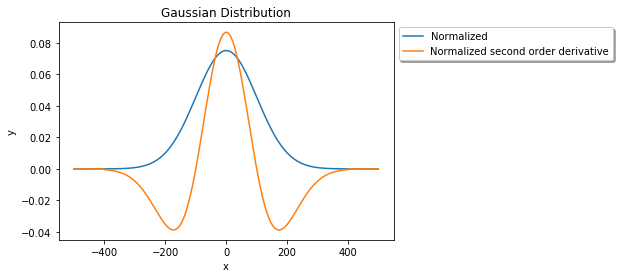

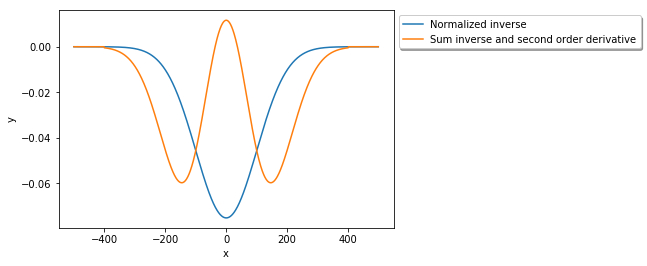

NameError: name 'xyzGaus' is not defined

In [2]:
points = np.zeros((1000,1))
middle = 500
points[middle] = 1
y0st = gaussian_filter(copy(points), 100, order=0)
y2st = gaussian_filter(copy(points), 100, order=2)

y0st = y0st/ np.linalg.norm(y0st)
y2st = y2st/ np.linalg.norm(y2st)

plt.title('Gaussian Distribution')
plt.plot(range(-500, 500 , 1,), y0st, label='Normalized')

plt.plot(range(-500, 500, 1), y2st, label='Normalized second order derivative')


plt.legend(loc='upper left', bbox_to_anchor=(1, 1),shadow=True, ncol=1)
plt.ylabel('y')
plt.xlabel('x')

plt.figure()
plt.plot(range(-500, 500 , 1,), -y0st, label='Normalized inverse')
plt.plot(range(-500, 500 , 1,), -y0st + y2st, label='Sum inverse and second order derivative')


plt.legend(loc='upper left', bbox_to_anchor=(1, 1),shadow=True, ncol=1)
plt.ylabel('y')
plt.xlabel('x')
plt.show()  

ran = np.arange(-1000, 1000, 0.1)
y = []
y1 = []
for x in ran:
    y1.append(-xyzGaus(np.asarray([50]), np.asarray([x])))
    y.append(-xyzGausSecondOrder(np.asarray([25]), np.asarray([x])))

y = np.multiply(y,[25**math.e])
y1 = y1 / np.linalg.norm(y1)
plt.plot(ran, y)
plt.plot(ran, y1)